# Employee Retention Classification - A Classification Challenge with various Neural Networks

### Importing General Libraries

In [ ]:
# importing general python libraries
import numpy as np
import pandas as pd

# importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# importing libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# importing libraries for model evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

# importing libraries for model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# importing tensorflow libraries for deep learning
import tensorflow as tf
from tensorflow import keras


## About Our Classification Dataset


This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It has been anonymized to protect privacy while still providing valuable insights into the workforce.
The source of the dataset is [Kaggle](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset).

### Columns description:

**Target Column:**
* **`LeaveorNot`**: a target column (binary).



**Numeric Columns:**
* **`Age`**: The age of each employee, providing demographic insights (numeric).
* **`JoiningYear`**: The year each employee joined the company, indicating their length of service (numeric).
* **`ExperienceinCurrentDomain`**: The number of years of experience employees have in their current field (numeric).


**Categorical Columns:**
* **`PaymentTier`**: Categorization of employees into different salary tiers (3 ordinal categories).
* **`Education`**: The educational qualifications of employees, including degree, institution, and field of study (3 ordinal categories).
* **`Gender`**: Gender identity of employees, promoting diversity analysis (binary in this dataset).
* **`City`**: The location or city where each employee is based or works (3 nominal categories).
* **`EverBenched`**: Indicates if an employee has ever been temporarily without assigned work (binary).


## Loading Data and Preprocessing

In [ ]:
clf_df = pd.read_csv('https://raw.githubusercontent.com/FreeDataSets/DataPool/main/employees.csv').drop('Salary') # reading the dataset from a url link
# getting a first look at the dataset
clf_df.info()
clf_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education                  4653 non-null   object 
 1   JoiningYear                4653 non-null   int64  
 2   City                       4653 non-null   object 
 3   Age                        4653 non-null   int64  
 4   Gender                     4653 non-null   object 
 5   EverBenched                4653 non-null   object 
 6   ExperienceInCurrentDomain  4653 non-null   int64  
 7   LeaveOrNot                 4653 non-null   int64  
 8   Salary                     4653 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 327.3+ KB


,Education,JoiningYear,City,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Salary
0,Bachelors,2017,Bangalore,34,Male,No,0,0,84116.60
1,Bachelors,2013,Pune,28,Female,No,3,1,32678.82
2,Bachelors,2014,New Delhi,38,Female,No,2,0,67390.16
3,Masters,2016,Bangalore,27,Male,No,5,1,73902.99
4,Masters,2017,Pune,24,Male,Yes,2,1,73780.50


In [ ]:
clf_df.describe().T # checking wether there are any unusual values in the dataset - 
# There are no unusual values in the dataset

,count,mean,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,1.863377,2012.00,2013.00,2015.00,2017.00,2018.00
Age,4653.0,29.393295,4.826087,22.00,26.00,28.00,32.00,41.00
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.00,2.00,3.00,4.00,7.00
LeaveOrNot,4653.0,0.343864,0.475047,0.00,0.00,0.00,1.00,1.00
Salary,4653.0,71909.246063,19564.326975,9697.32,57203.47,75042.99,86188.97,125479.03


In [ ]:
# X and y split
Xclf = clf_df.drop('LeaveOrNot', axis=1) # features
yclf = clf_df['LeaveOrNot'] # target variable

In [ ]:
# Encoding Categorical Features - taken from CHATGPT
one_hot_cat_features = [ 'Gender', 'EverBenched'] # features with two categories
dummie_vars =  ['Education', 'City',] # features with 3-4 categories

Xclf = pd.get_dummies(Xclf, columns=one_hot_cat_features, drop_first=True)
Xclf = pd.get_dummies(Xclf, columns=dummie_vars, drop_first=False)

## Train-Test Split

In [ ]:
#train test split
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(Xclf, yclf, test_size=0.2, random_state=42)

## 5) Exploring the Target Variable

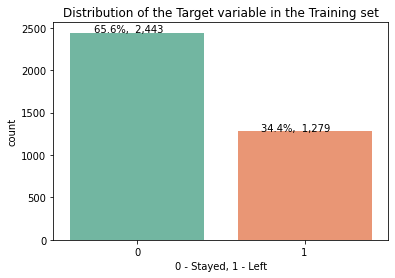

In [ ]:
#  - Plotting the y variable - taken from CHATGPT
ax = sns.countplot(x=y_clf_train, palette='Set2');
plt.title('Distribution of the Target variable in the Training set');
plt.xlabel('0 - Stayed, 1 - Left');
# Add percentage labels to the bars - taken from CHATGPT
total = len(y_clf_train)
for p in ax.patches:
    percentage = '{:.1f}%,  {:,}'.format(100 * p.get_height() / total, int(p.get_height()))
    x = p.get_x() + p.get_width() / 2 - 0.05
    y_height = p.get_height() + 6
    ax.annotate(percentage, (x, y_height), fontsize=10, color='black', ha='center');
plt.show();

In [ ]:
# showing count values normalized and not normalized 
display(y_clf_train.value_counts().to_frame().merge(y_clf_train.value_counts(normalize=True).round(2), left_index=True, right_index=True, suffixes=(' #', ' %')));
print("Our predicted class is clearly imbalanced. We now take care of that")

,LeaveOrNot #,LeaveOrNot %
0,2443,0.66
1,1279,0.34


Our predicted class is clearly imbalanced. We now take care of that


### Selecting a method to handel imbalance in our dataset
In our specific case, since we're dealing with employee retention prediction, it's likely that identifying employees who leave (the minority class) is crucial for organizations. Therefore, we would use **oversampling algorithm ADASYN**. 

It is useful for avoiding over-fitting, because it assesses the difficulty of classifying instances within the minority class and generates synthetic samples where they are most needed, enabling a generalization of our classifier. 



In [ ]:
from imblearn.over_sampling import ADASYN 

# Instantiate the ADASYN sampler
adasyn = ADASYN(random_state=42)

# Fit and transform the training data - 
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_clf_train, y_clf_train)
print("X_train_resampled.shape() vs X_train.shape()")
print(X_train_resampled.shape)
print(X_clf_train.shape)

X_train_resampled.shape() vs X_train.shape()
(4854, 12)
(3722, 12)


## Applying XGBoost and Random Forest

In [ ]:
""""1/2 XGBOOST CLASSIFIER (RESAMPLED DATA)""" 

sc_resmp =StandardScaler().fit(X_train_resampled) # standardizing the resampled data

# import pipeline and xgboost
from sklearn.pipeline import Pipeline
import xgboost as xgb
# Creating a pipeline 
xgb_pipeline = Pipeline([
                        ('scaler', sc_resmp), 
                        ('xgb', xgb.XGBClassifier()) # create an XGBoost Classifier
                       ])


# Create the parameter grid
param_grid_xgb = {
    'xgb__eta': [0.6,0.5,0.1,0.05,0.01],  # Values to search for learning rate
    'xgb__max_depth': [2,3,4,5]  # Values to search for max depth
}

""" Q6) d)

`xgb__eta` - the learning rate, controls the step size at each iteration while moving toward a minimum of the loss function. 

`xgb__max_depth` - controls the maximum depth of individual trees (base learners) in the gradient boosting ensemble
"""

# Create a GridSearchCV object
gs_xgb_clf_resmp = GridSearchCV(
    xgb_pipeline,          # The pipeline containing the classifier and preprocessing steps
    param_grid=param_grid_xgb,
    cv=5,              # Number of cross-validation folds
    n_jobs=-1,         # Use all available CPU cores for parallelization
    verbose=3        # Verbosity level (increase for more details)
)

# Fit the GridSearchCV to the training data
gs_xgb_clf_resmp.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the best model
print("Best Hyperparameters:", gs_xgb_clf_resmp.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Best Hyperparameters: {'xgb__eta': 0.5, 'xgb__max_depth': 3}


In [ ]:
"""" 2/2 RANDOM FOREST CLASSIFIER (RESAMPLED DATA)""" 

from sklearn.ensemble import RandomForestClassifier

rf_resampled_pipeline = Pipeline([('scaler', sc_resmp),('rf', RandomForestClassifier())])

# Create the parameter grid
rf_clf_param_grid = {'rf__n_estimators': [100, 200], 'rf__max_depth': [3,5,7,10, 20, None] }

""" 
DEFINING HYPERPARAMETER GRID
 
`rf__n_estimators` -  the number of decision trees that make up the Random Forest, controls the diversity and complexity of the ensemble. A higher number of trees can improve the model's performance up to a point.

`max_depth` - Maximum depth of Trees, controls the level of granularity at which the trees can make splits. A deeper tree can capture more complex relationships in the data but is more prone to overfitting
"""

# Create the GridSearchCV object
rf_resampled_grid_search = GridSearchCV(estimator=rf_resampled_pipeline, param_grid=rf_clf_param_grid, cv=5, n_jobs=-1, verbose=3)
          

# Fit the model to the training data
rf_resampled_grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", rf_resampled_grid_search.best_params_)
print("Training Accuracy: {:.2f}%".format(rf_resampled_grid_search.best_score_*100))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


Best Hyperparameters:  {'rf__max_depth': 10, 'rf__n_estimators': 100}
Training Accuracy: 83.46%


## Applying a Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network model
nn_model_res = keras.Sequential([
    layers.Input(shape=(12,)),            # Input layer with 12 features
    layers.Dense(64, activation='tanh'),  # Hidden layer with 64 units and tanh activation
    layers.Dense(32, activation='tanh'),  # Hidden layer with 32 units and tanh activation
    layers.Dense(1, activation='sigmoid') # Output layer with 1 unit (for binary classification) and sigmoid activation
]);

# Compile the model
nn_model_res.compile(optimizer='adam',           # Adam optimizer
              loss='binary_crossentropy', # Binary cross-entropy loss (for binary classification)
              metrics=['accuracy']);      # Monitor accuracy during training
nn_model_res.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**The input layer** specifies the shape of the input data, which is (12,) in this case, indicating that there are 12 features.

**Two hidden layers** with 64 and 32 units, respectively, are included. These layers use the Tanh activation function, that squashes the output between -1 and 1, providing non-linearity and capturing complex relationships in the data.

**The output layer** has a single unit because this is a binary classification problem (sigmoid activation function).


In [ ]:
X_clf_train_transformed_resampled = sc_resmp.transform(X_train_resampled) # scaling the test data with the same scaler that was used for the training data

# fitting the NN on the resampled data
nn_model_res.fit(X_clf_train_transformed_resampled, y_train_resampled,  epochs=10, batch_size=32, verbose=1); 

Epoch 1/10


152/152 [==============================] - 2s 2ms/step - loss: 0.5418 - accuracy: 0.7250
Epoch 2/10
152/152 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7567
Epoch 3/10
152/152 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7750
Epoch 4/10
152/152 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7773
Epoch 5/10
152/152 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.7841
Epoch 6/10
152/152 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.7981
Epoch 7/10
152/152 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.7998
Epoch 8/10
152/152 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8103
Epoch 9/10
152/152 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8105
Epoch 10/10
152/152 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8115


## Testing and Evaluating Models

In [ ]:

X_clf_test_transformed_resmp = sc_resmp.transform(X_clf_test) # sacling the test data using the fitted scaler



# creating a function to print the classification report for each model - 
def model_classification_report(model_name ,model, X_train, y_train, X_test, y_test):
    """
    This function takes in a model, training and test data and returns the classification report for the model
    """
    # Make predictions on the transformed test data using the fitted model
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Generate classification reports for each model
    report_train = classification_report(y_train, y_pred_train.round())
    report_test = classification_report(y_test, y_pred_test.round())
    # print the name of the model
    print("="*70)
    print(model_name,":")
    # Print the classification report for each model
    print("TRAIN:\n", report_train)
    print("TEST:\n", report_test)
    print("="*70, "\n")
    # print("-"*70)

XGboost - Pre-Resampled Data :
TRAIN:
               precision    recall  f1-score   support

           0       0.66      0.99      0.79      2443
           1       0.71      0.03      0.06      1279

    accuracy                           0.66      3722
   macro avg       0.69      0.51      0.42      3722
weighted avg       0.68      0.66      0.54      3722

TEST:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79       610
           1       0.77      0.03      0.06       321

    accuracy                           0.66       931
   macro avg       0.72      0.51      0.43       931
weighted avg       0.70      0.66      0.54       931




Random Forest - Pre-Resampled Data :
TRAIN:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      2443
           1       0.66      0.53      0.59      1279

    accuracy                           0.75      3722
   macro avg       0.72      0.69      0.70      3722
weighted avg       0.74      0.75      0.74      3722

TEST:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       610
           1       0.73      0.56      0.64       321

    accuracy                           0.78       931
   macro avg       0.76      0.73      0.74       931
weighted avg       0.77      0.78      0.77       931


30/30 [==============================] - 0s 2ms/step
Neural Network - Pre-Resampled Data :
TRAIN:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      2443
           1       0.83      0.63      0.72      1279

    accuracy                  

In [ ]:
# print the classification report for each model trained on the resampled data
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
model_classification_report("XGboost - Resampled Data", gs_xgb_clf_resmp, X_clf_train_transformed_resampled, y_train_resampled, X_clf_test_transformed_resmp, y_clf_test)
model_classification_report("Random Forest - Resampled Data", rf_resampled_grid_search, X_clf_train_transformed_resampled, y_train_resampled, X_clf_test_transformed_resmp, y_clf_test)
model_classification_report("Neural Network - Resampled Data", nn_model_res, X_clf_train_transformed_resampled, y_train_resampled, X_clf_test_transformed_resmp, y_clf_test)

# stop ignoring UserWarning warnings
warnings.filterwarnings('default', category=UserWarning)

XGboost - Resampled Data :
TRAIN:
               precision    recall  f1-score   support

           0       0.58      0.09      0.16      2443
           1       0.50      0.93      0.65      2411

    accuracy                           0.51      4854
   macro avg       0.54      0.51      0.40      4854
weighted avg       0.54      0.51      0.40      4854

TEST:
               precision    recall  f1-score   support

           0       0.55      0.10      0.17       610
           1       0.33      0.84      0.47       321

    accuracy                           0.36       931
   macro avg       0.44      0.47      0.32       931
weighted avg       0.47      0.36      0.27       931




Random Forest - Resampled Data :
TRAIN:
               precision    recall  f1-score   support

           0       0.71      0.82      0.76      2443
           1       0.78      0.66      0.72      2411

    accuracy                           0.74      4854
   macro avg       0.74      0.74      0.74      4854
weighted avg       0.74      0.74      0.74      4854

TEST:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       610
           1       0.63      0.57      0.60       321

    accuracy                           0.74       931
   macro avg       0.71      0.70      0.70       931
weighted avg       0.73      0.74      0.74       931


30/30 [==============================] - 0s 2ms/step
Neural Network - Resampled Data :
TRAIN:
               precision    recall  f1-score   support

           0       0.77      0.92      0.84      2443
           1       0.90      0.72      0.80      2411

    accuracy                         

The Neural Network model preformed with the best `Accuracy`. It has the highest accuracy on both the training and test sets. All models preformed fine without overfitting or underfitting significantly.

**`Recall`** measures the proportion of true positives among all the actual positives (employees who left) In the context of employee retention, high recall means that the model is effective at identifying employees who are likely to leave, minimizing missed opportunities for retention efforts.

Based on the **`Recall`**, XGboost preformed the best on the resampled test set, so it should be considered as the most suited model.